In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



##  Data Exploration and Preprocessing

In [148]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/boston_housing.csv')

In [149]:
# our target value is medv--> median value
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [150]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [151]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [152]:
missing_values = df.isnull().sum()

print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


## here data seem to be intact without any null values

## Check in the data for any outliers in target variable

<Axes: ylabel='medv'>

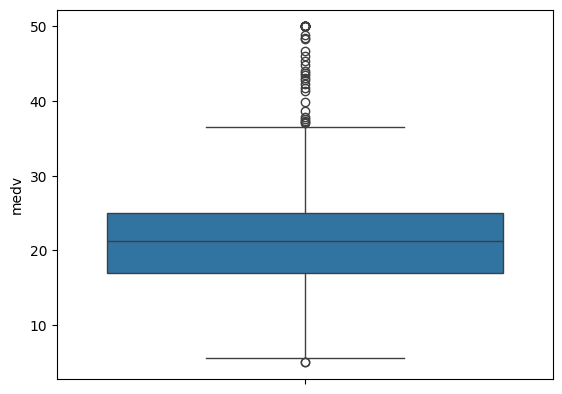

In [183]:
sns.boxplot(df['medv'])

In [184]:
Q1=df.medv.quantile(0.25)
Q3=df.medv.quantile(0.75)
Q1,Q3

(np.float64(17.025), np.float64(25.0))

In [185]:
IQR= Q3-Q1
IQR

np.float64(7.975000000000001)

In [186]:
lower_limit= Q1 -1.5*IQR
Upper_limit= Q3 +1.5*IQR
lower_limit,Upper_limit

(np.float64(5.0624999999999964), np.float64(36.962500000000006))

In [242]:
outliers=df[(df.medv<lower_limit)|(df.medv>Upper_limit)]
len(outliers)

40

### looks like there are only 40 outliers 

In [270]:
# Seperating the outliers from the normal data set
df_nooutlier= df.loc[(df['medv']<Upper_limit)&(df['medv']>lower_limit)]
df_nooutlier

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [356]:
# Creating a different csv file without outliers
#df_nooutlier.to_csv('..\data\data_Nooutlierstarget.csv', index=False)

# plotting variable vs target value

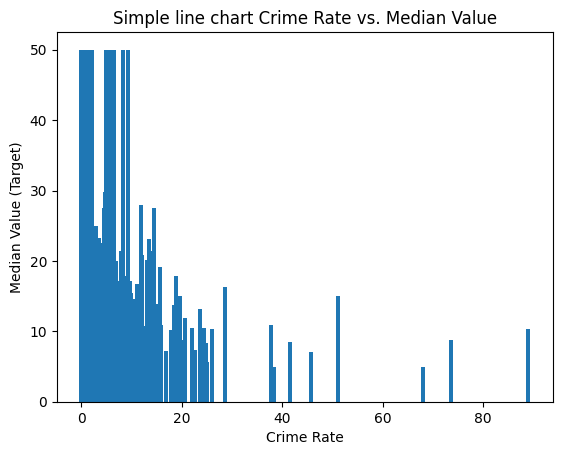

In [946]:
# bar plot
plt.bar(df['crim'],df['medv'])
plt.xlabel("Crime Rate")
plt.ylabel('Median Value (Target)')
plt.title('Simple line chart Crime Rate vs. Median Value')
plt.show()

# Bar plot analysis
### Median Value has negative correlation to crime rate meaning areas with less crime has higher housing rate.
### Most data points are clustered at lower crime rates (0 to 20), with a higher density of points at very low crime rates (close to 0).
### Home values for these lower crime rate areas vary widely, but there is a concentration of homes with median values between $20,000 to $40,000.

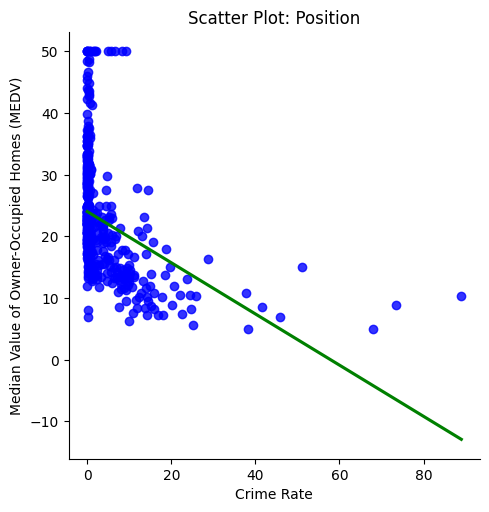

In [947]:
#scatter plot
sns.lmplot(x='crim', y='medv', data=df, scatter_kws={'color': 'blue'},line_kws={'color': 'green'},ci=None)
plt.xlabel('Crime Rate')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Scatter Plot: Position')
plt.show()

There seems to be negative corelation between median vlaue of owner occupied homes and crime rate.

## Barplot of room vs medv

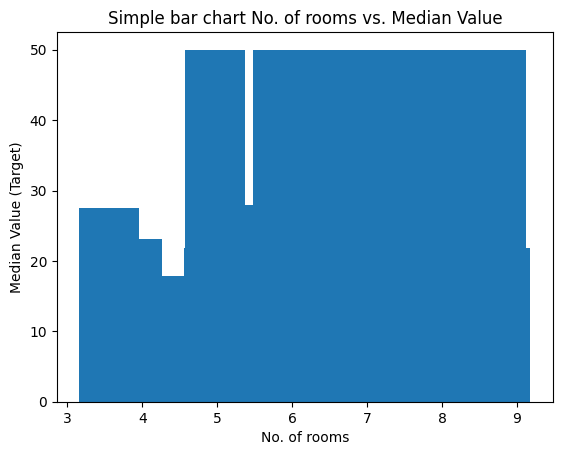

In [948]:

plt.bar(df['rm'],df['medv'])
plt.xlabel("No. of rooms")
plt.ylabel('Median Value (Target)')
plt.title('Simple bar chart No. of rooms vs. Median Value')
plt.show()

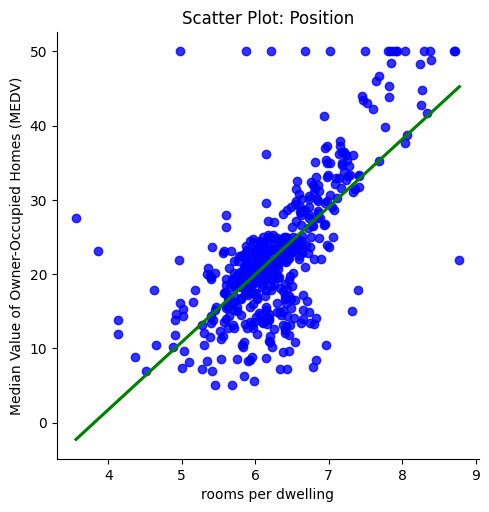

In [949]:
#scatter plot
sns.lmplot(x='rm', y='medv', data=df, scatter_kws={'color': 'blue'},line_kws={'color': 'green'},ci=None)
plt.xlabel('rooms per dwelling')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Scatter Plot: Position')
plt.show()

# avg rooms vs median value
### There is a high density of data points around 5 to 7 rooms per dwelling and median home values between 20,000 and 30,000 dollars.There seems to be high corelation between rooms per dwelling and median value of homes.

# BarPlot Age vs medianValue

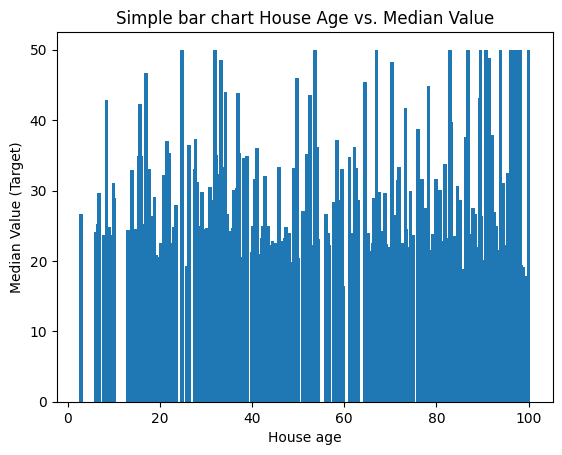

In [950]:
plt.bar(df['age'],df['medv'])
plt.xlabel("House age")
plt.ylabel('Median Value (Target)')
plt.title('Simple bar chart House Age vs. Median Value')
plt.show()

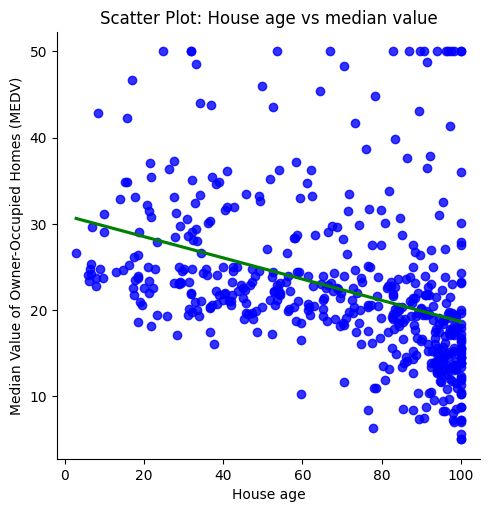

In [951]:
#scatter plot
sns.lmplot(x='age', y='medv', data=df, scatter_kws={'color': 'blue'},line_kws={'color': 'green'},ci=None)
plt.xlabel('House age')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Scatter Plot: House age vs median value')
plt.show()

### Correllation:
### There is negative linear correlation between house age and median home value.
### Homes with a wide range of ages can have a variety of median values, indicating that house age alone is not a strong predictor of median home value in this dataset.

## distance from Boston employment center vs median value

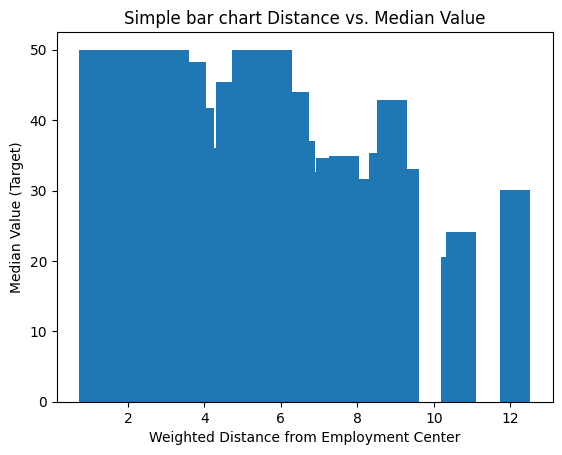

In [952]:
plt.bar(df['dis'],df['medv'])
plt.xlabel("Weighted Distance from Employment Center")
plt.ylabel('Median Value (Target)')
plt.title('Simple bar chart Distance vs. Median Value')
plt.show()

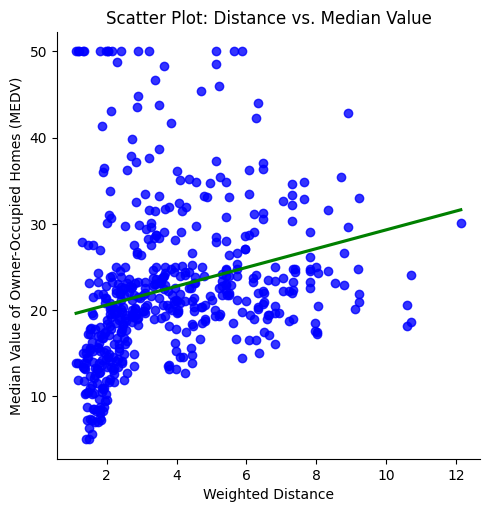

In [953]:
#scatter plot
sns.lmplot(x='dis', y='medv', data=df, scatter_kws={'color': 'blue'},line_kws={'color': 'green'},ci=None)
plt.xlabel('Weighted Distance')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Scatter Plot: Distance vs. Median Value')
plt.show()

Positive Correlation: There appears to be a positive correlation between weighted distance and median home value. This means that as the weighted distance increases, the median value of homes tends to increase for this data set.

# accessibility to radial highway  vs median value


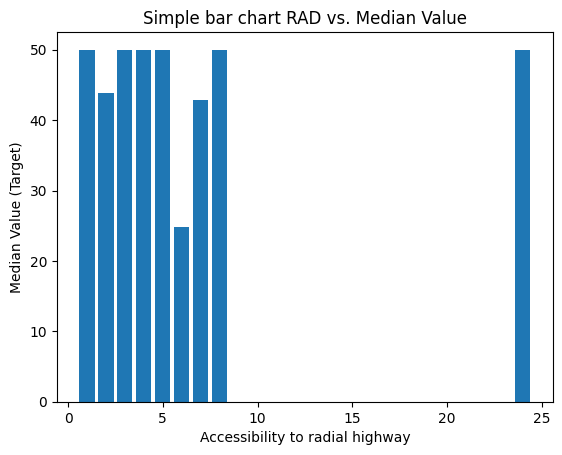

In [954]:
plt.bar(df['rad'],df['medv'])
plt.xlabel("Accessibility to radial highway")
plt.ylabel('Median Value (Target)')
plt.title('Simple bar chart RAD vs. Median Value')
plt.show()

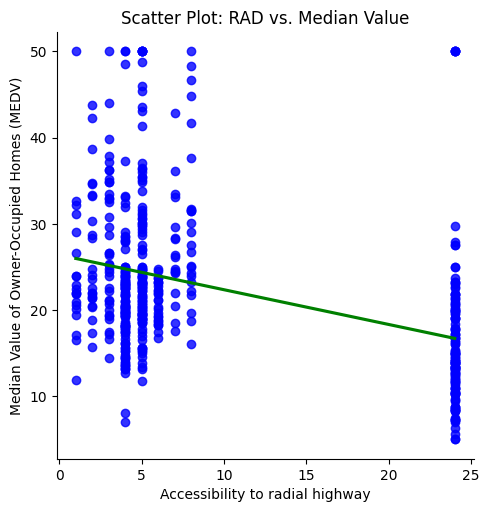

In [955]:
#scatter plot
sns.lmplot(x='rad', y='medv', data=df, scatter_kws={'color': 'blue'},line_kws={'color': 'green'},ci=None)
plt.xlabel('Accessibility to radial highway')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Scatter Plot: RAD vs. Median Value')
plt.show()

There seems to be a negative correlation between RAD and MEDV. This suggests that, generally, as accessibility to radial highways increases, the median value of homes tends to decrease. However, this relationship seems to be not very strong.

## tax vs medv

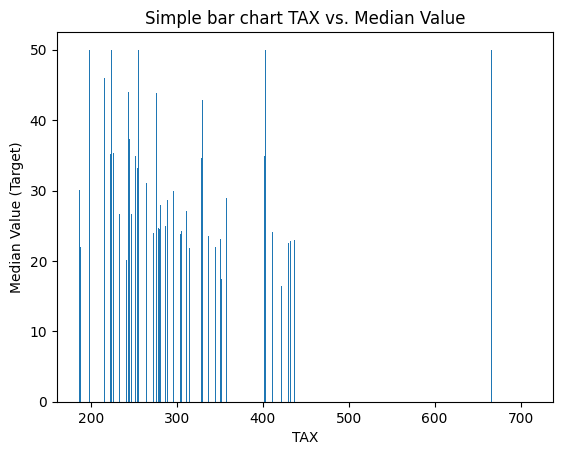

In [956]:
plt.bar(df['tax'],df['medv'])
plt.xlabel("TAX")
plt.ylabel('Median Value (Target)')
plt.title('Simple bar chart TAX vs. Median Value')
plt.show()

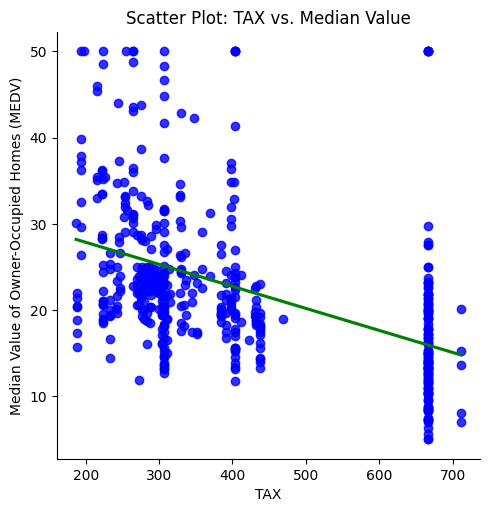

In [957]:
#scatter plot
sns.lmplot(x='tax', y='medv', data=df, scatter_kws={'color': 'blue'},line_kws={'color': 'green'},ci=None)
plt.xlabel('TAX')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Scatter Plot: TAX vs. Median Value')
plt.show()

Negative Correlation: There seems to be a negative correlation between TAX and MEDV, especially for TAX values below 600. This suggests that, generally, as property tax rates increase, the median value of homes tends to decrease, but the relationship is not very strong.

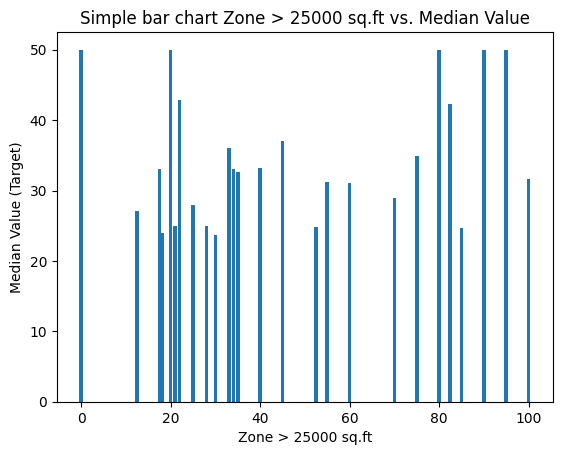

In [958]:
plt.bar(df['zn'],df['medv'])
plt.xlabel("Zone > 25000 sq.ft")
plt.ylabel('Median Value (Target)')
plt.title('Simple bar chart Zone > 25000 sq.ft vs. Median Value')
plt.show()

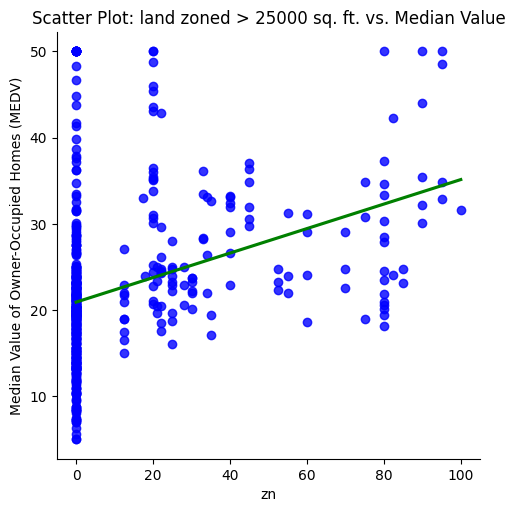

In [959]:
#scatter plot
sns.lmplot(x='zn', y='medv', data=df, scatter_kws={'color': 'blue'},line_kws={'color': 'green'},ci=None)
plt.xlabel('zn')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Scatter Plot: land zoned > 25000 sq. ft. vs. Median Value')
plt.show()

Positive Negative Correlation: There appears to be a Positive correlation between the proportion of land zoned for lots over 25,000 sq. ft. and the median home value. This means that as the proportion of land zoned for large lots increases, the median value of homes tends to increase.

## pupil-teacher ratio vs median value(target)

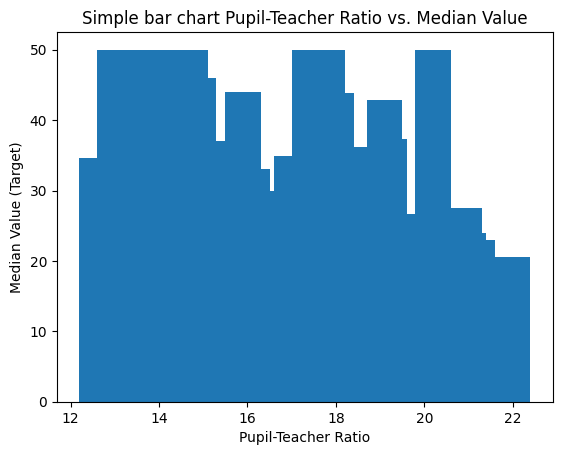

In [960]:
plt.bar(df['ptratio'],df['medv'])
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel('Median Value (Target)')
plt.title('Simple bar chart Pupil-Teacher Ratio vs. Median Value')
plt.show()

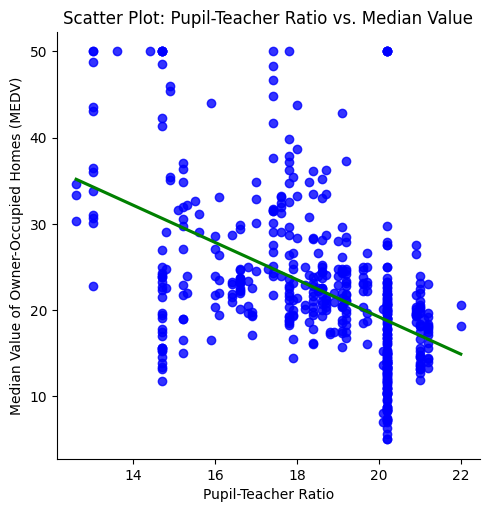

In [961]:
#scatter plot
sns.lmplot(x='ptratio', y='medv', data=df, scatter_kws={'color': 'blue'},line_kws={'color': 'green'},ci=None)
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Scatter Plot: Pupil-Teacher Ratio vs. Median Value')
plt.show()

Negative Correlation: There appears to be a negative correlation between pupil-teacher ratio and median home value. This means that as the pupil-teacher ratio increases, the median value of homes tends to decrease.

## No of black residents vs median value

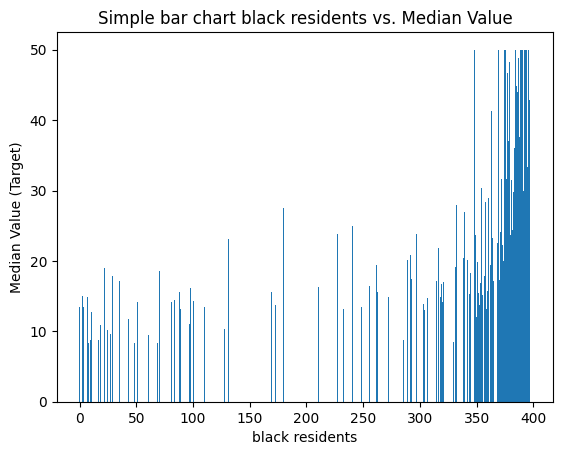

In [962]:
plt.bar(df['b'],df['medv'])
plt.xlabel("black residents")
plt.ylabel('Median Value (Target)')
plt.title('Simple bar chart black residents vs. Median Value')
plt.show()

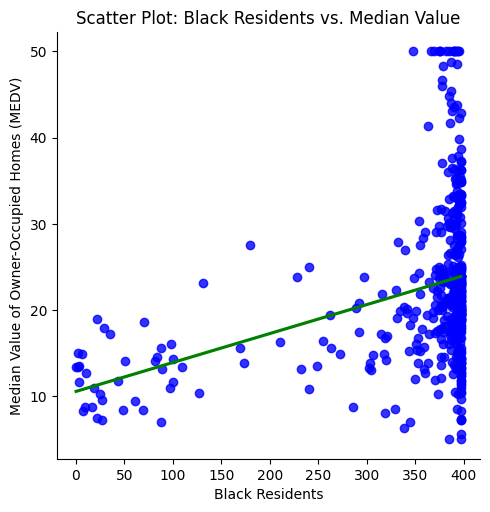

In [963]:
#scatter plot
sns.lmplot(x='b', y='medv', data=df, scatter_kws={'color': 'blue'},line_kws={'color': 'green'},ci=None)
plt.xlabel('Black Residents')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Scatter Plot: Black Residents vs. Median Value')
plt.show()

Positive Correlation: There appears to be a positive correlation between the proportion of black residents and the median home value. This means that as the proportion of black residents increases, the median value of homes tends to increase.

## Lower Status population vs median value

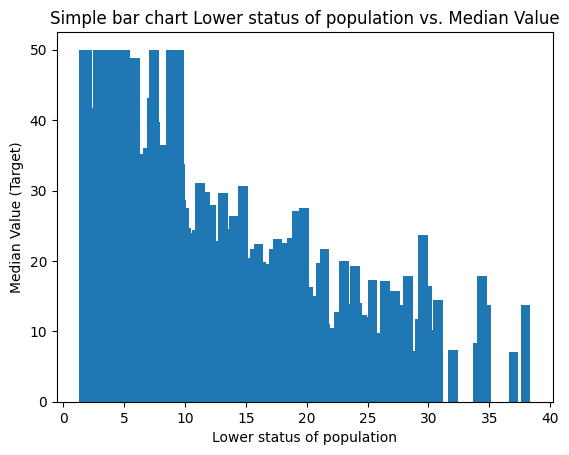

In [964]:
plt.bar(df['lstat'],df['medv'])
plt.xlabel("Lower status of population")
plt.ylabel('Median Value (Target)')
plt.title('Simple bar chart Lower status of population vs. Median Value')
plt.show()

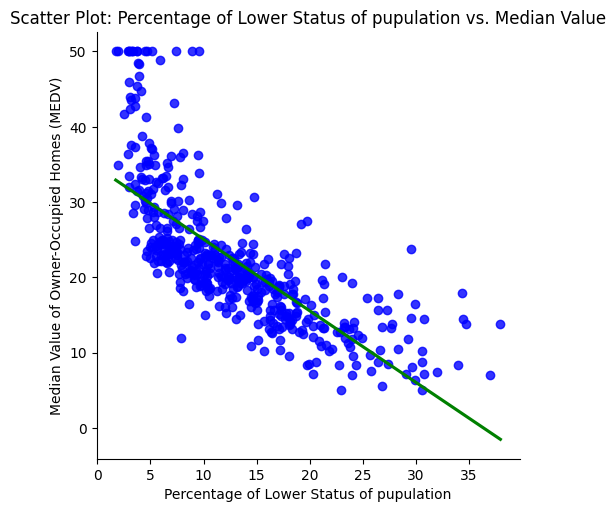

In [965]:
#scatter plot
sns.lmplot(x='lstat', y='medv', data=df, scatter_kws={'color': 'blue'},line_kws={'color': 'green'},ci=None)
plt.xlabel('Percentage of Lower Status of pupulation')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Scatter Plot: Percentage of Lower Status of pupulation vs. Median Value')
plt.show()

Negative Correlation: There is a clear negative correlation between the percentage of lower-status population and the median home value. This indicates that as the percentage of lower-status population increases, the median home value tends to decrease.

## Non-Retail Business Acers per town vs median value

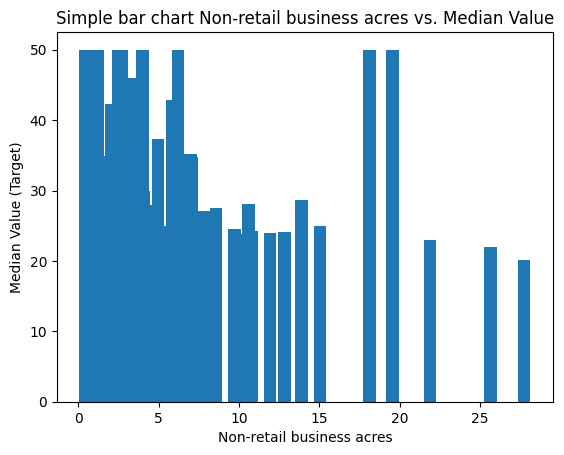

In [966]:
plt.bar(df['indus'],df['medv'])
plt.xlabel("Non-retail business acres")
plt.ylabel('Median Value (Target)')
plt.title('Simple bar chart Non-retail business acres vs. Median Value')
plt.show()

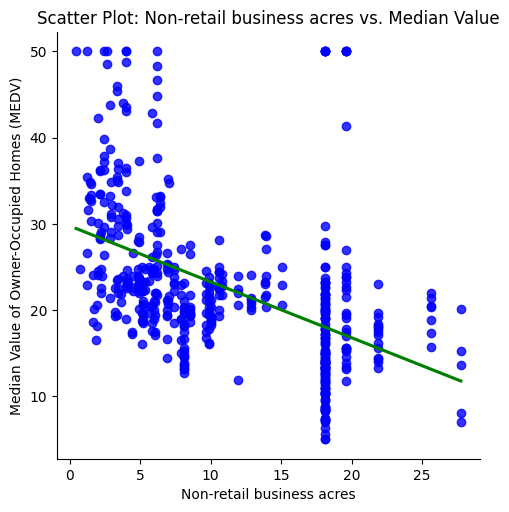

In [967]:
#scatter plot
sns.lmplot(x='indus', y='medv', data=df, scatter_kws={'color': 'blue'},line_kws={'color': 'green'},ci=None)
plt.xlabel('Non-retail business acres')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Scatter Plot: Non-retail business acres vs. Median Value')
plt.show()

Weak Negative Correlation: There appears to be a weak negative correlation between the amount of non-retail business acres and the median home value. This indicates that, generally, as the amount of non-retail business acres increases, the median home value tends to decrease. However, this relationship is not very strong.

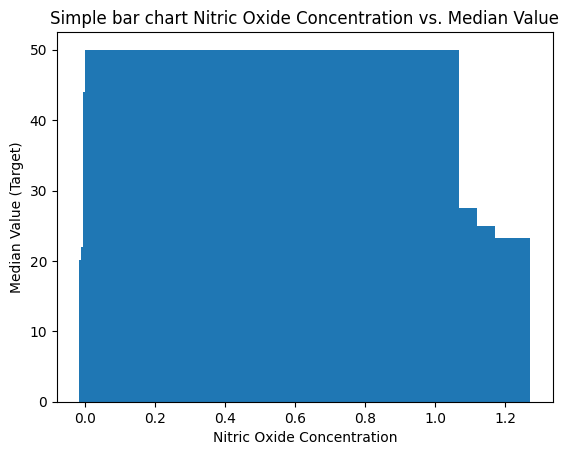

In [968]:
plt.bar(df['nox'],df['medv'])
plt.xlabel("Nitric Oxide Concentration")
plt.ylabel('Median Value (Target)')
plt.title('Simple bar chart Nitric Oxide Concentration vs. Median Value')
plt.show()

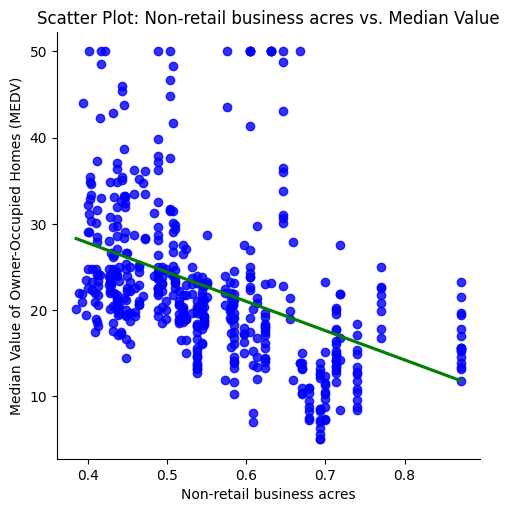

In [969]:
#scatter plot
sns.lmplot(x='nox', y='medv', data=df, scatter_kws={'color': 'blue'},line_kws={'color': 'green'},ci=None)
plt.xlabel('Non-retail business acres')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Scatter Plot: Non-retail business acres vs. Median Value')
plt.show()

Weak Negative Correlation: There appears to be a weak negative correlation between the amount of non-retail business acres and the median home value. This indicates that, generally, as the amount of non-retail business acres increases, the median home value tends to decrease. However, this relationship is not very strong.

## correlation

In [970]:
import seaborn as sns
df_corr= df.corr()

<Axes: >

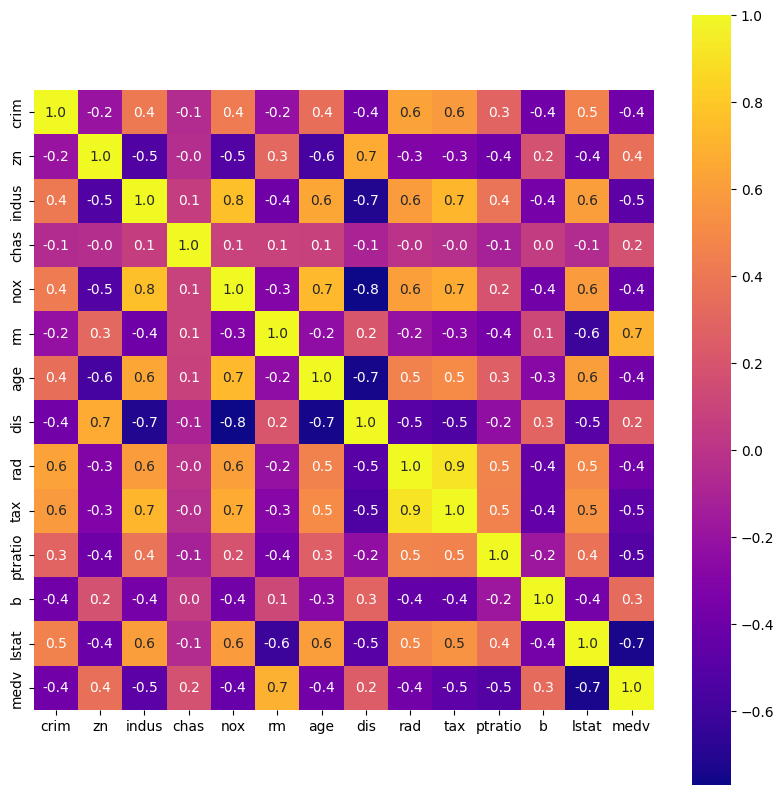

In [971]:
# using heatmap for correlation
plt.figure(figsize=(10,10)) # 10 by 10 inches
sns.heatmap(df_corr,cbar=True,fmt='.1f',annot=True,annot_kws={'size':10}, square=True,cmap="plasma")

## This data represents a heatmap of the data when we remove the outliers from target variable

<Axes: >

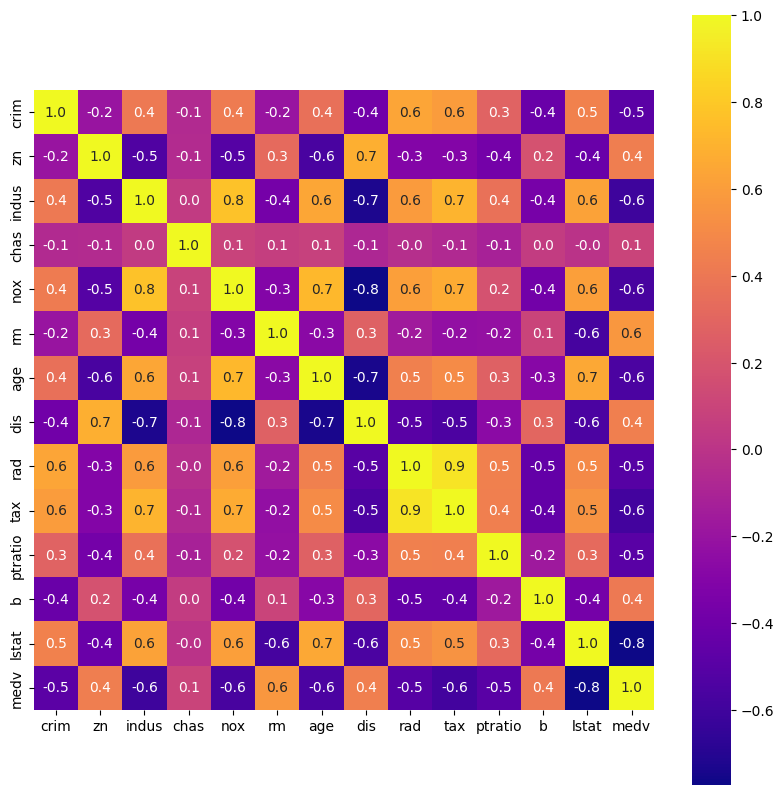

In [972]:
df_corr2= df_nooutlier.corr()
plt.figure(figsize=(10,10)) # 10 by 10 inches
sns.heatmap(df_corr2,cbar=True,fmt='.1f',annot=True,annot_kws={'size':10}, square=True,cmap="plasma")

## identifying individual outliers


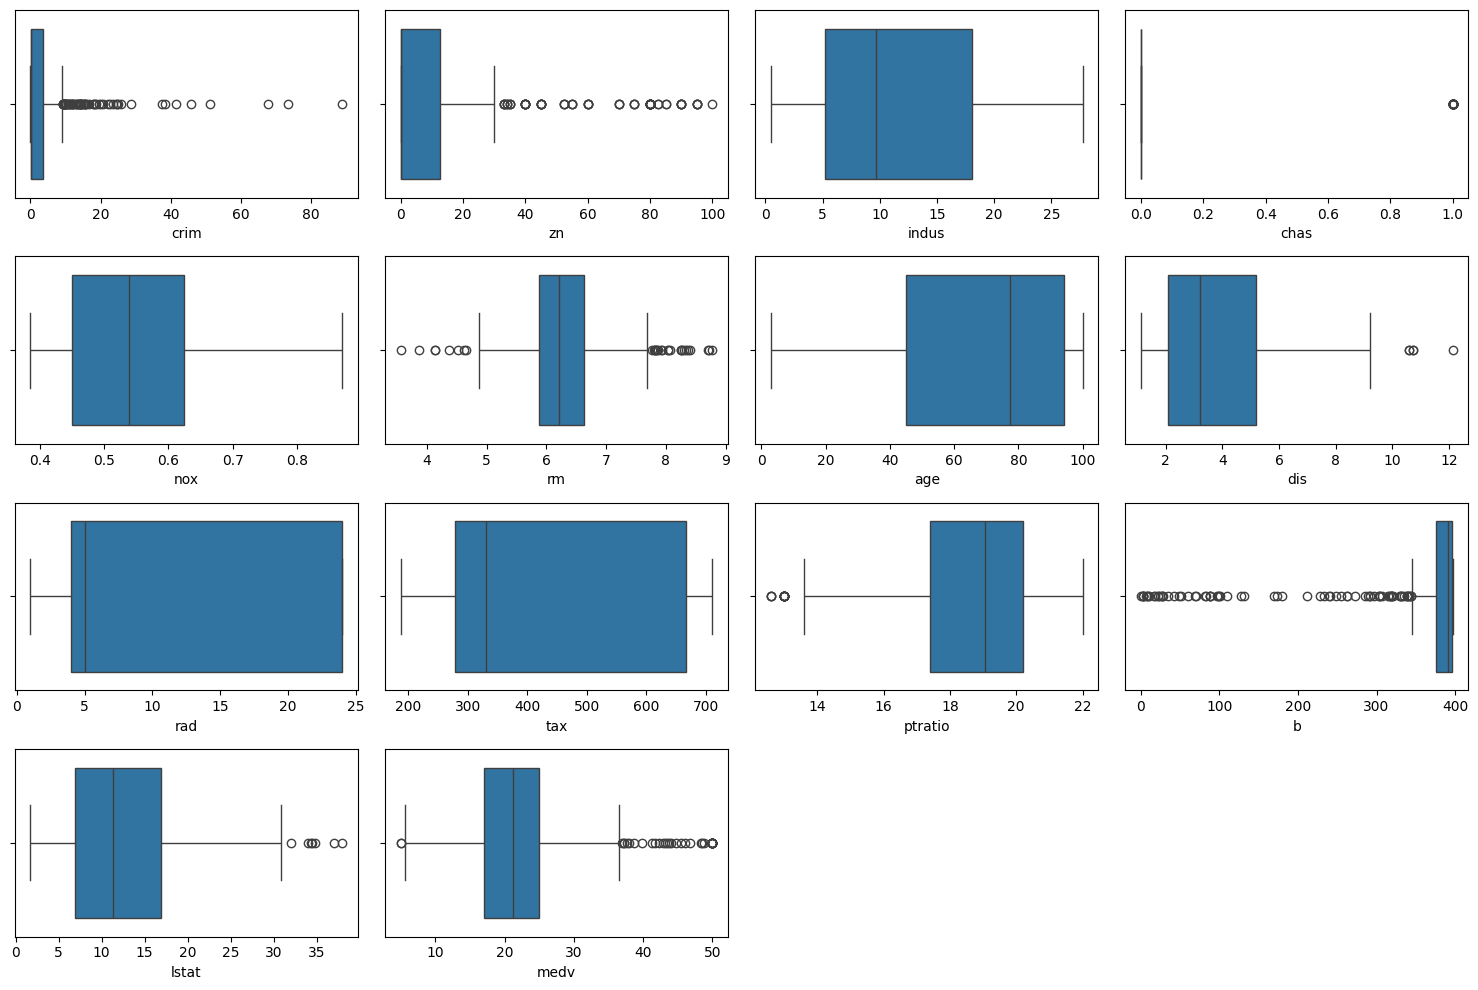

In [973]:
#Visualizing outlier values with boxplot

columns = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat", "medv"]

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns):
    plt.subplot(4, 4, i+1) 
    sns.boxplot(x=df[col])

plt.tight_layout()
plt.show()